# Treated Vs Un-treated golf balls

* Visualize data 
* determine hypothesis
* hypothesis test

In [36]:
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats

In [37]:
golf_df = pandas.read_csv(f"C:/Users/eckbergj/.vscode/week6activity2621/Golf.csv")
golf_df.head()
golf_df.describe()

,Untreated,Treated
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


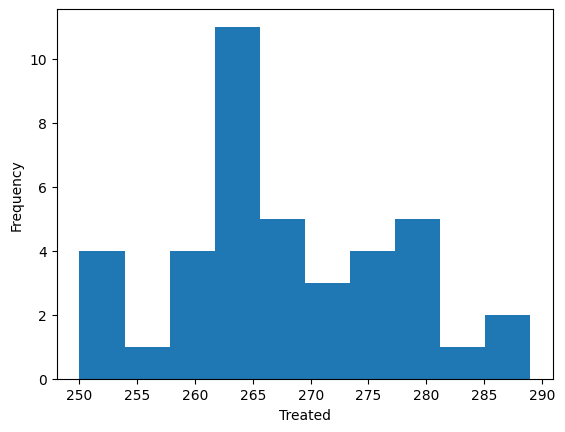

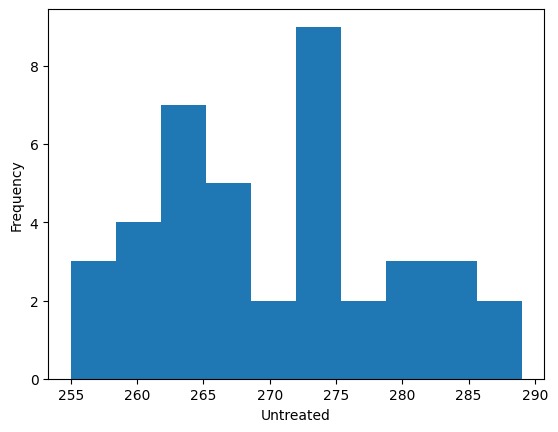

In [38]:
# use histogram
plt.hist(golf_df["Treated"], bins=10)
plt.xlabel("Treated")
plt.ylabel("Frequency")
plt.show()

plt.hist(golf_df["Untreated"], bins=10)
plt.xlabel("Untreated")
plt.ylabel("Frequency")
plt.show()

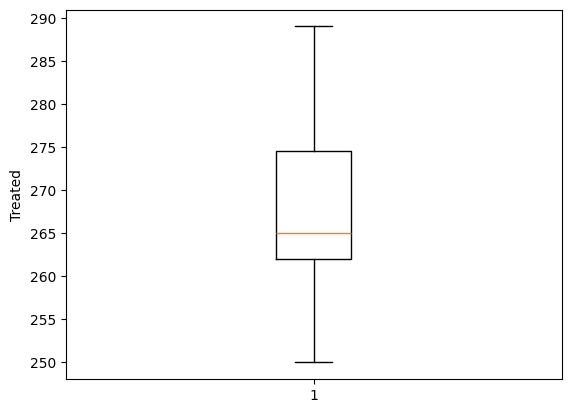

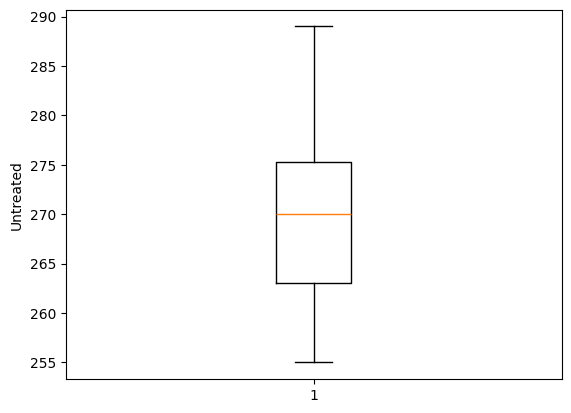

In [39]:
# boxplot
plt.boxplot(golf_df["Treated"])
plt.ylabel("Treated")
plt.show()
plt.boxplot(golf_df["Untreated"])
plt.ylabel("Untreated")
plt.show()

In [40]:
# use t test, untreated is the null

# find mean of untreated
untreated_mean = golf_df["Untreated"].mean()
print(f"Mean of untreated: {untreated_mean}")

# find mean of treated
treated_mean = golf_df["Treated"].mean()
print(f"Mean of treated: {treated_mean}")

# use two sample t test?
t_statistic, p_value = stats.ttest_ind(golf_df["Treated"], golf_df["Untreated"])
print(f"T-statistic: {t_statistic}, P-value: {p_value}")




Mean of untreated: 270.275
Mean of treated: 267.5
T-statistic: -1.3283615935245678, P-value: 0.18793228491854658


# Ames Housing prices

In [41]:
# load in ames housing prices
ames_df = pandas.read_csv(f"C:/Users/eckbergj/.vscode/week6activity2621/AmesHousing.csv")
ames_df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [42]:
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [43]:
ames_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   str    
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   str    
 7   Alley            198 non-null    str    
 8   Lot Shape        2930 non-null   str    
 9   Land Contour     2930 non-null   str    
 10  Utilities        2930 non-null   str    
 11  Lot Config       2930 non-null   str    
 12  Land Slope       2930 non-null   str    
 13  Neighborhood     2930 non-null   str    
 14  Condition 1      2930 non-null   str    
 15  Condition 2      2930 non-null   str    
 16  Bldg Type        2930 non-null   str    
 17  House Style      2930 non

In [44]:
ames_df["Wood Deck SF"].head(20)
ames_df["Pool Area"].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Pool Area, dtype: int64

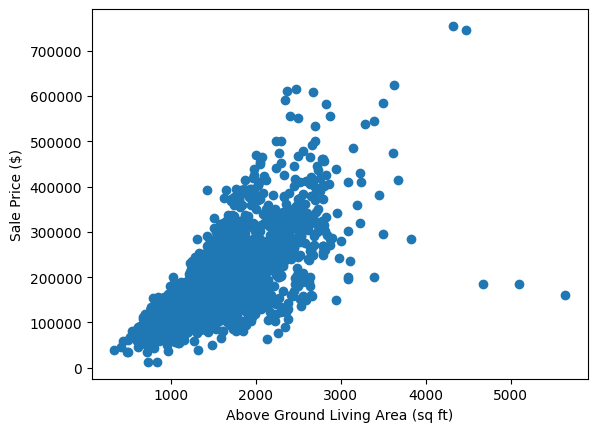

In [45]:
# what features are likely to be correlated with sales price?
plt.scatter(ames_df["Gr Liv Area"], ames_df["SalePrice"])
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price ($)")
plt.show()

Overall Qual (Ordinal): Rates the overall material and finish of the house
Overall Cond (Ordinal): Rates the overall condition of the house
Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

Garage Cond (Ordinal): Garage condition
Garage Qual (Ordinal): Garage quality

Bldg Type (Nominal): Type of dwelling
MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.

collect categorical features on the amenities

Then collect sq foot numbers for portions of the house (e.g. garage)

Heating	(Nominal): Type of heating
HeatingQC (Ordinal): Heating quality and condition

## Features of interest:

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.
Garage Qual (Ordinal): Garage quality
Overall Qual (Ordinal): Rates the overall material and finish of the house
Overall Cond (Ordinal): Rates the overall condition of the house
Electrical (Ordinal): Electrical system
1st Flr SF (Continuous): First Floor square feet
2nd Flr SF (Continuous)	: Second floor square feet
KitchenQual (Ordinal): Kitchen quality

Open Porch SF (Continuous): Open porch area in square feet
Wood Deck SF (Continuous): Wood deck area in square feet
Pool Area (Continuous): Pool area in square feet

In [46]:
# one hot encode MS SubClass
# krisker wallace test
ames_df = pandas.get_dummies(ames_df, columns=["MS SubClass"], drop_first=True)
print(ames_df.head())
print(ames_df.columns)


   Order        PID MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0      1  526301100        RL         141.0     31770   Pave   NaN       IR1   
1      2  526350040        RH          80.0     11622   Pave   NaN       Reg   
2      3  526351010        RL          81.0     14267   Pave   NaN       IR1   
3      4  526353030        RL          93.0     11160   Pave   NaN       Reg   
4      5  527105010        RL          74.0     13830   Pave   NaN       IR1   

  Land Contour Utilities  ... MS SubClass_70 MS SubClass_75 MS SubClass_80  \
0          Lvl    AllPub  ...          False          False          False   
1          Lvl    AllPub  ...          False          False          False   
2          Lvl    AllPub  ...          False          False          False   
3          Lvl    AllPub  ...          False          False          False   
4          Lvl    AllPub  ...          False          False          False   

  MS SubClass_85 MS SubClass_90 MS SubClass_120 MS

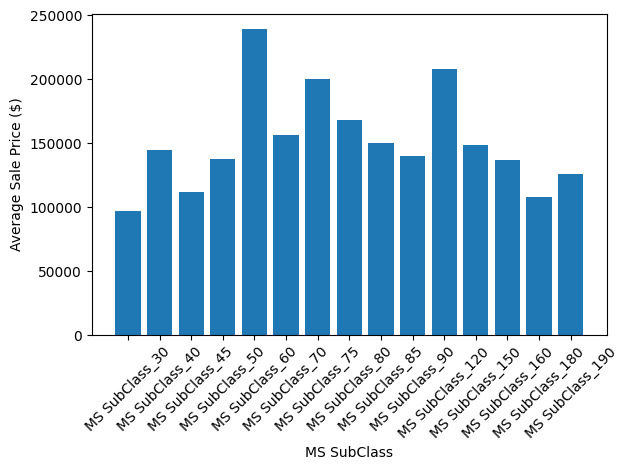

C:\Users\eckbergj\AppData\Local\Temp\ipykernel_33104\3821793513.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ames_df[ames_df[col] == True]["SalePrice"] for col in ms_subclass_cols], labels=ms_subclass_cols)


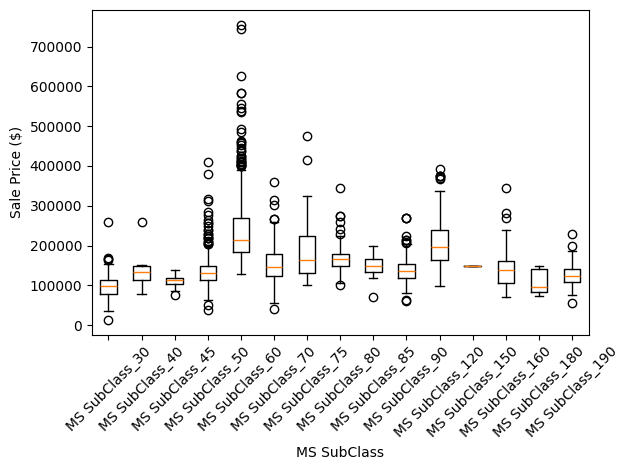

In [53]:
# bar chart comparing MS Subclass to Sale Price
ms_subclass_cols = ["MS SubClass_30","MS SubClass_40","MS SubClass_45","MS SubClass_50","MS SubClass_60","MS SubClass_70", "MS SubClass_75", "MS SubClass_80", "MS SubClass_85", "MS SubClass_90", "MS SubClass_120", "MS SubClass_150", "MS SubClass_160", "MS SubClass_180", "MS SubClass_190"]
mean_prices = [ames_df[ames_df[col] == True]["SalePrice"].mean() for col in ms_subclass_cols]
plt.bar(ms_subclass_cols, mean_prices)
plt.xlabel("MS SubClass")
plt.ylabel("Average Sale Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# next do a boxplot of the sale prices by MS SubClass
plt.boxplot([ames_df[ames_df[col] == True]["SalePrice"] for col in ms_subclass_cols], labels=ms_subclass_cols)
plt.xlabel("MS SubClass")
plt.ylabel("Sale Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# maybe do a Kruskal-Wallis test?
krushkal_statistic, kruskal_p_value = stats.kruskal(*[ames_df[ames_df[col] == True]["SalePrice"] for col in ms_subclass_cols])
print(f"Kruskal-Wallis statistic: {krushkal_statistic}, P-value: {kruskal_p_value}")

# this implies that there is a significant difference in the sale prices of the different MS SubClasses

# effect size for Kruskal-Wallis test
n = len(ms_subclass_cols)
k = len(ames_df)
eta_squared = (krushkal_statistic - (n - 1)) / (k - n)
print(f"Eta squared: {eta_squared:.4f}")

# do a deeper dive on kruskal-wallis test, maybe do a pairwise comparison with Dunn's test or something similar?

Kruskal-Wallis statistic: 1033.073275557081, P-value: 1.2512009429048867e-211
Eta squared: 0.3496


In [ ]:
ames_df["Neighborhood"].value_counts()

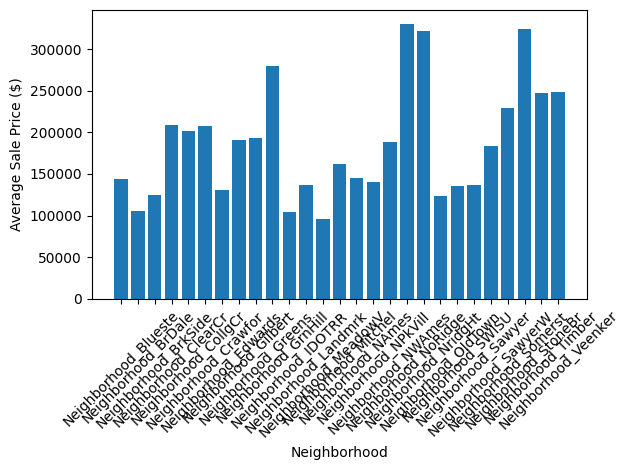

C:\Users\eckbergj\AppData\Local\Temp\ipykernel_33104\771485535.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ames_df[ames_df[col] == True]["SalePrice"] for col in neighborhood_cols], labels=neighborhood_cols)


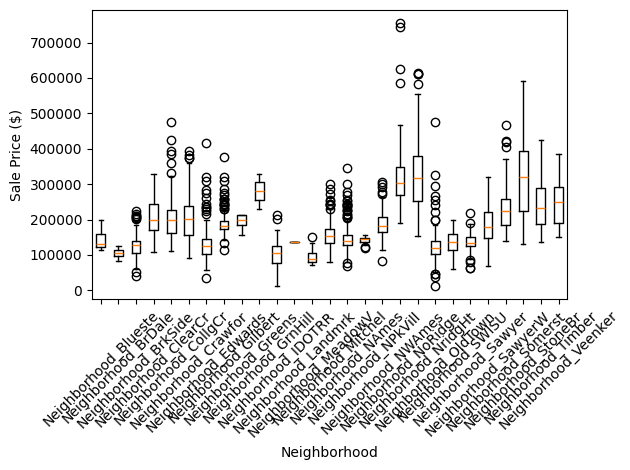

In [ ]:
# next do this for neighborhoods, maybe do a boxplot of the sale prices by neighborhood, then do a Kruskal-Wallis
ames_df = pandas.get_dummies(ames_df, columns=["Neighborhood"], drop_first=True)

# bar chart comparing Neighborhood to Sale Price
neighborhood_cols = [col for col in ames_df.columns if col.startswith("Neighborhood_")]
mean_prices_neighborhood = [ames_df[ames_df[col] == True]["SalePrice"].mean() for col in neighborhood_cols]
plt.bar(neighborhood_cols, mean_prices_neighborhood)
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# boxplot of the sale prices by Neighborhood
plt.boxplot([ames_df[ames_df[col] == True]["SalePrice"] for col in neighborhood_cols], labels=neighborhood_cols)
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
# next do a Kruskal-Wallis test for neighborhoods
krushkal_statistic_neighborhood, kruskal_p_value_neighborhood = stats.kruskal(*[ames_df[ames_df[col] == True]["SalePrice"] for col in neighborhood_cols])
print(f"Kruskal-Wallis statistic for neighborhoods: {krushkal_statistic_neighborhood}, P-value: {kruskal_p_value_neighborhood:.10f}")

# kruskal wallis test effect size
n = len(neighborhood_cols)
k = len(ames_df)
eta_squared = (krushkal_statistic_neighborhood - (n - 1)) / (k - n)
print(f"Eta squared for neighborhoods: {eta_squared:.4f}")

Kruskal-Wallis statistic for neighborhoods: 1779.6060593620546, P-value: 0.0000000000
Eta squared for neighborhoods: 0.6041


In [ ]:
# pearsons R and spearmans rank correlation coefficient between Gr Liv Area and Sale Price
pearson_r, pearson_p = stats.pearsonr(ames_df["Gr Liv Area"], ames_df["SalePrice"])
spearman_r, spearman_p = stats.spearmanr(ames_df["Gr Liv Area"], ames_df["SalePrice"])
print(f"Pearson's R: {pearson_r}, P-value: {pearson_p:.8f}")
print(f"Spearman's R: {spearman_r}, P-value: {spearman_p:.8f}")

# so we should use Gr Liv Area as a feature in our model, since it is highly correlated with Sale Price

# same for Wood Deck SF and Sale Price
pearson_r, pearson_p = stats.pearsonr(ames_df["Wood Deck SF"], ames_df["SalePrice"])
spearman_r, spearman_p = stats.spearmanr(ames_df["Wood Deck SF"], ames_df["SalePrice"])
print(f"Pearson's R: {pearson_r}, P-value: {pearson_p:.4f}")
print(f"Spearman's R: {spearman_r}, P-value: {spearman_p}")

# same for Pool Area and Sale Price
pearson_r, pearson_p = stats.pearsonr(ames_df["Pool Area"], ames_df["SalePrice"])
spearman_r, spearman_p = stats.spearmanr(ames_df["Pool Area"], ames_df["SalePrice"])
print(f"Pearson's R: {pearson_r}, P-value: {pearson_p}")
print(f"Spearman's R: {spearman_r}, P-value: {spearman_p}")


Pearson's R: 0.7067799209766279, P-value: 0.00000000
Spearman's R: 0.7233420361092494, P-value: 0.00000000
Pearson's R: 0.3271431739831681, P-value: 0.0000
Spearman's R: 0.3641854809112399, P-value: 1.3702118101058466e-92
Pearson's R: 0.06840324689815862, P-value: 0.00021106379128741653
Spearman's R: 0.05356956599396797, P-value: 0.0037252283395162898


In [ ]:
# are 1st Flr SF & 2nd Flr SF correlated?
pearson_r, pearson_p = stats.pearsonr(ames_df["1st Flr SF"], ames_df["2nd Flr SF"])
spearman_r, spearman_p = stats.spearmanr(ames_df["1st Flr SF"], ames_df["2nd Flr SF"])
print(f"Pearson's R: {pearson_r}, P-value: {pearson_p}")
print(f"Spearman's R: {spearman_r}, P-value: {spearman_p}")

# are 1st Flr SF & 2nd Flr SF correlated with Sale Price?
pearson_r, pearson_p = stats.pearsonr(ames_df["1st Flr SF"], ames_df["SalePrice"])
spearman_r, spearman_p = stats.spearmanr(ames_df["1st Flr SF"], ames_df["SalePrice"])
print(f"Pearson's R: {pearson_r}, P-value: {pearson_p}")
print(f"Spearman's R: {spearman_r}, P-value: {spearman_p}")


Pearson's R: -0.2500572012022184, P-value: 5.187198851098971e-43
Spearman's R: -0.3262502718822295, P-value: 1.2574685363557196e-73


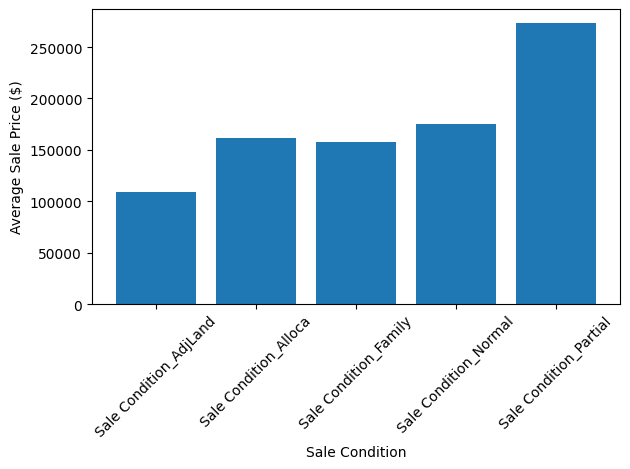

In [58]:
# expand sale condition to dummy values then asses vs sale price
ames_df = pandas.get_dummies(ames_df, columns=["Sale Condition"], drop_first=True)

plt.bar([col for col in ames_df.columns if col.startswith("Sale Condition_")], [ames_df[ames_df[col] == True]["SalePrice"].mean() for col in ames_df.columns if col.startswith("Sale Condition_")])
plt.xlabel("Sale Condition")
plt.ylabel("Average Sale Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
# kruskal-wallis test for sale condition
sale_condition_cols = [col for col in ames_df.columns if col.startswith("Sale Condition_")]
krushkal_statistic_sale_condition, kruskal_p_value_sale_condition = stats.kruskal(*[ames_df[ames_df[col] == True]["SalePrice"] for col in sale_condition_cols])
print(f"Kruskal-Wallis statistic for sale condition: {krushkal_statistic_sale_condition}, P-value: {kruskal_p_value_sale_condition:.10f}")

# kruskall-wallis effect size for sale condition
n = len(ames_df) # no missing values
k = len(sale_condition_cols)
eta_squared = (krushkal_statistic_sale_condition - k + 1) / (n - k)
print(f"Kruskal-Wallis effect size (eta squared) for sale condition: {eta_squared:.10f}")


Kruskal-Wallis statistic for sale condition: 287.6677790280869, P-value: 0.0000000000
Effect size (eta squared) for sale condition: 0.0894


* so right now

* GR living area:  Above grade (ground) living area square feet
* total basement SQ feet
* Garage Area
* neighborhood
* Sale Condition
* Overall Quality 
* house type category (MS SubClass)
    * the question is now, how does MS Subclass correlate with some of the other categorical variables?
    * can we find a better combination of them then just using MS SubClass?
    * This may capture a lot of the other variables
* Maybe MS vnr area
* year 